<a href="https://colab.research.google.com/github/vimesh630/Revenue_Forecasting/blob/main/XGBoost_for_Revenue_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Necessary Libraries

In [6]:
!pip install xgboost

import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#2. Mount Google Drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#3. Load the Data

In [8]:
train_path='/content/drive/MyDrive/VERGER/Revenue_Forecasting/train_forecast_data.csv'
test_path='/content/drive/MyDrive/VERGER/Revenue_Forecasting/test_forecast_data.csv'

train_df=pd.read_csv(train_path)
test_df=pd.read_csv(test_path)

#4. Select Features and Target

In [9]:
features = ['Account', 'Product', 'Type',
            'Lag_Qty_1', 'Lag_Qty_2', 'Lag_Rev_1', 'Lag_Rev_2',
            'Rolling_Qty_3', 'Rolling_Rev_3']

target = 'Forecast_Revenue'

# Drop rows with missing values
train_df = train_df.dropna(subset=features + [target])
test_df = test_df.dropna(subset=features + [target])

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]


#5. Setup Preprocessing Pipeline

In [10]:
categorical_features = ['Account', 'Product', 'Type']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categorical_features)],
    remainder='passthrough'
)

#6. Create XGBoost Pipeline

In [11]:
from xgboost import XGBRegressor

xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        random_state=42
    ))
])

#7. train the Model

In [12]:
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Account', 'Product',
                                                   'Type'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, ...))])

#8. Evaluate the Model

In [14]:
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5 # Calculate RMSE by taking the square root of MSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 XGBoost Revenue Forecasting Results:")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE : {mae:.2f}")
print(f"  R²  : {r2:.4f}")


📊 XGBoost Revenue Forecasting Results:
  RMSE: 30594.75
  MAE : 12019.62
  R²  : -0.3198


#9. Feature Importance Plot

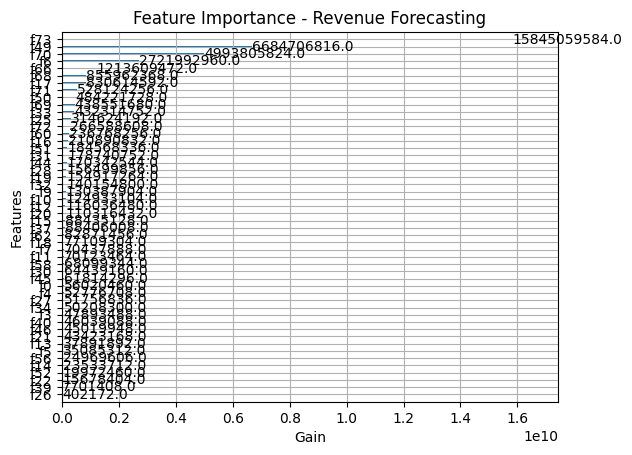

In [15]:
import matplotlib.pyplot as plt

# Access underlying XGB model
xgb_final_model = xgb_model.named_steps['regressor']
feature_names = xgb_model.named_steps['preprocessor'].get_feature_names_out()

# Plot
xgb.plot_importance(xgb_final_model, importance_type='gain', xlabel='Gain')
plt.title("Feature Importance - Revenue Forecasting")
plt.show()
